### Разработка модели машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров. 

#### Ассоциация «ЭкоФерма» готова предоставить подробные данные о своих коровах. Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:

- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

#### С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

### Описание данных

#### Имеется три датасета:

- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

#### Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:

* id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

#### Признаки в датасете ferma_main.csv можно разделить на группы.

- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
- Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

#### Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.
- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

#### Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.

Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

In [61]:
!pip install -U scikit-learn

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import phik
from scipy import stats as st

In [63]:
# pip install phik

In [64]:
ferma_main=pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')
ferma_dad=pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')
cow_buy=pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')

In [65]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [66]:
display(ferma_main.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [67]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [68]:
display(ferma_dad.head())

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [69]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [70]:
display(cow_buy.head())

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Во всех датафреймах столбцы названы некорректно, переименуем их

In [71]:
# функция переименования столбцов
def rename_columns(df, old_name, new_name):
    if len(old_name)==len(new_name):
        dictionary = dict(zip(old_name, new_name))
        return df.rename(columns=dictionary)
    else: 
        return 'Проверьте длину списка!'

In [72]:
# переименуем столбцы во всех Датафреймах
ferma_main_old_name=ferma_main.columns
ferma_main_new_name=['id', 'milk_yield', 'efu','crude_protein', 'spr', 'breed',
       'pasture_type', 'papa_bull_breed', 'fat_content', 'protein',
       'milk_taste', 'age']

ferma_dad_old_name=ferma_dad.columns
ferma_dad_new_name=['id', 'dad_name']

cow_buy_old_name=cow_buy.columns
cow_buy_new_name=['breed', 'pasture_type', 'papa_bull_breed', 'dad_name',
       'fat_content', 'protein', 'age']


ferma_main=rename_columns(ferma_main, ferma_main_old_name, ferma_main_new_name)
ferma_dad=rename_columns(ferma_dad, ferma_dad_old_name, ferma_dad_new_name)
cow_buy=rename_columns(cow_buy, cow_buy_old_name, cow_buy_new_name)

#### Вывод:

    - Все данные загружены 
    - Изменены названия столбцов на корректные 

#### Выполнение:

Тип колонок с вещественными значениями представлен как object, поскольку целая часть отделена от дробной запятой. Для того, чтобы изменить тип колонок необходимо заменить запятые на точки во всём датафрейме 

In [73]:
# # # функция замены запятой на точку
# def replace_commas(s):
#     s = str(s)
#     return s.replace(',', '.')

#### Функцию закомментировал

In [74]:
# заменим запятые на точки в ferma_main  поменяем тип данных
ferma_main['efu'] = ferma_main['efu'].astype('float')
ferma_main['spr'] = ferma_main['spr'].astype('float')
ferma_main['fat_content'] = ferma_main['fat_content'].astype('float')
ferma_main['protein'] = ferma_main['protein'].astype('float')


ferma_main.head()

,id,milk_yield,efu,crude_protein,spr,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [75]:
# зпоменяем тип данных
cow_buy['fat_content'] = cow_buy['fat_content'].astype('float')
cow_buy['protein'] = cow_buy['protein'].astype('float')

cow_buy.head()

,breed,pasture_type,papa_bull_breed,dad_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


#### Проверим данные на пропуски

In [76]:
print(ferma_main.isnull().sum())
print('--------------')
print(cow_buy.isnull().sum())
print('--------------')
print(ferma_dad.isnull().sum())

id                 0
milk_yield         0
efu                0
crude_protein      0
spr                0
breed              0
pasture_type       0
papa_bull_breed    0
fat_content        0
protein            0
milk_taste         0
age                0
dtype: int64
--------------
breed              0
pasture_type       0
papa_bull_breed    0
dad_name           0
fat_content        0
protein            0
age                0
dtype: int64
--------------
id          0
dad_name    0
dtype: int64


#### Пропусков не обнаружено

#### Перед проверкой на дубликаты заменим все буквы в словах на строчные

In [77]:
# функция по уменьшению букв
def df_lower(df, lower_list):
    for value in lower_list:
        df[value]=df[value].str.lower()
    
# создадим списки, где надоуменьшить буквы и уменьшим их 
ferma_main_lower_list=['breed','pasture_type', 'papa_bull_breed', 'milk_taste', 'age']
cow_buy_lower_list=['breed','pasture_type', 'papa_bull_breed', 'dad_name', 'age']
ferma_dad_lower_list=['dad_name']

df_lower(ferma_main,ferma_main_lower_list)
df_lower(cow_buy, cow_buy_lower_list)
df_lower(ferma_dad, ferma_dad_lower_list)

In [78]:
print(ferma_main.duplicated().sum())
print('--------------')
print(cow_buy.duplicated().sum())
print('--------------')
print(ferma_dad.duplicated().sum())

5
--------------
4
--------------
0


In [79]:
# удалим дубликаты и обновим индексацию
ferma_main.drop_duplicates(inplace=True)
cow_buy.drop_duplicates(inplace=True)

print(ferma_main.duplicated().sum())
print('--------------')
print(cow_buy.duplicated().sum())
print('--------------')
print(ferma_dad.duplicated().sum())

0
--------------
0
--------------
0


#### Выводы

- заменены запятые на точки во всех столбцах
- все буквы заменены на строчные
- типы столбцов преобразованы. 
- проверено наличие пропущенных значений. 
- удалены дубликаты

#### Рассмотрим количественные признаки ferma_main

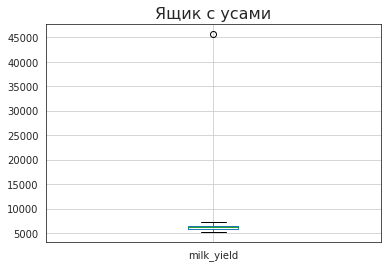

In [80]:
# Рассмотрим колонку удой кг/год и постром boxplot
ferma_main.boxplot(column='milk_yield')
plt.title('Ящик с усами', fontsize=16)
plt.show()

Обратим внимание на значение в районе 45000. Сскорее всего это выброс. 

Выведем строки, соответствующие данному значению 

In [81]:
print(ferma_main.loc[ferma_main['milk_yield'] > 10000])

    id  milk_yield   efu  crude_protein   spr           breed pasture_type  \
16  17       45616  11.5           1675  0.93  вис бик айдиал    холмистое   

   papa_bull_breed  fat_content  protein milk_taste          age  
16         айдиалл         3.22    3.076     вкусно  более_2_лет  


Очень похоже на ошибку при внесении значения в графу "Удой". Удалим строку, коскольку это значение сильновыбивается из основной массы. 

In [82]:
ferma_main.drop([16], inplace=True)

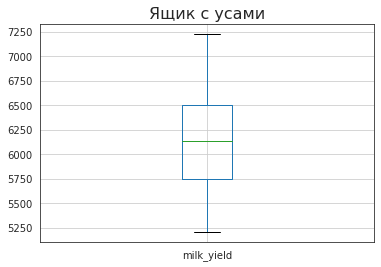

In [83]:
# повторно построи boxplot для колонки  колонку удой кг/год
ferma_main.boxplot(column='milk_yield')
plt.title('Ящик с усами', fontsize=16)
plt.show()

In [84]:
# Функция построения гистограмм с нанесенной медианой и средним
def hist_visio(df_ser, names, y_lim, bins):
    bins = bins # создаем массив бинов, где каждый бин - это целое число от 0 до максимального значения в датафрейме
    plt.hist(df_ser, bins=bins) # строим гистограмму
    plt.title(names[0], fontsize=16)
    plt.xlabel(names[1], fontsize=16)
    plt.ylabel(names[2], fontsize=16)
    median = df_ser.median()
    mean = df_ser.mean()
    plt.axvline(median, color='red', linestyle='-')
    plt.axvline(mean, color='green', linestyle='-')
    plt.ylim(y_lim[0], y_lim[1])
    plt.xlim(min(df_ser), max(df_ser))
    plt.legend(['Медиана', 'Среднее'], loc='upper left')
    plt.show()

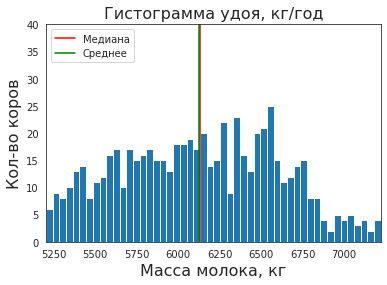

In [85]:
# Построим гистограмму обновленного удоя
names_milk_yield=['Гистограмма удоя, кг/год', 'Масса молока, кг', 'Кол-во коров']
y_lim_milk_yield=[0, 40]
hist_visio(ferma_main['milk_yield'], names_milk_yield, y_lim_milk_yield, 50)

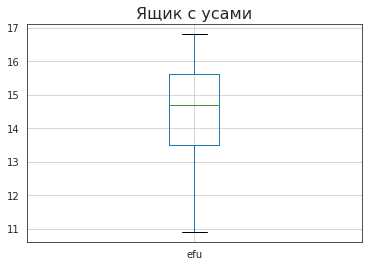

In [86]:
# рассмотрим ЭКЕ (Энергетическая кормовая единица)
ferma_main.boxplot(column='efu')
plt.title('Ящик с усами', fontsize=16)
plt.show()

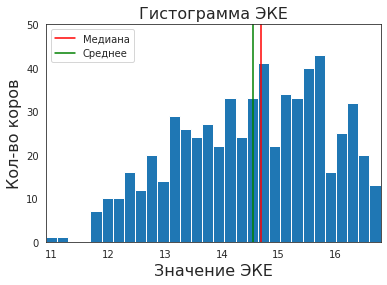

In [87]:
# построим гистограмму ЭКЕ
names_efu=['Гистограмма ЭКЕ', 'Значение ЭКЕ', 'Кол-во коров']
y_lim_efu=[0, 50]
hist_visio(ferma_main['efu'], names_efu, y_lim_efu, 30)

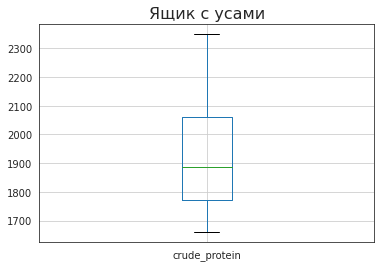

In [88]:
# Рассмотрим столбец Сырой протеин, г

ferma_main.boxplot(column='crude_protein')
plt.title('Ящик с усами', fontsize=16)
plt.show()

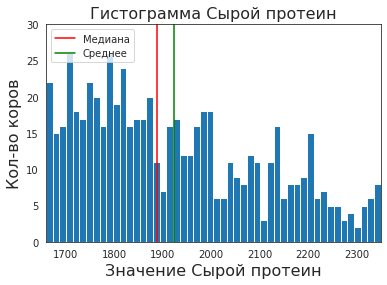

In [89]:
# построим гистограмму Сырой протеин

names_crube=['Гистограмма Сырой протеин', 'Значение Сырой протеин', 'Кол-во коров']
y_lim_crube=[0, 30]
hist_visio(ferma_main['crude_protein'], names_crube, y_lim_crube, 50)

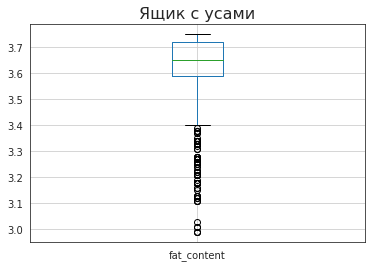

In [90]:
# Рассмотрим колонку Жирность и построим boxplot
ferma_main.boxplot(column='fat_content')
plt.title('Ящик с усами', fontsize=16)
plt.show()

С первого взгляда кажется, что наблюлается огромное количество выбросов

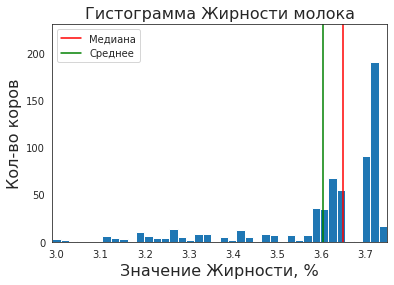

In [91]:
# построим гистограмму Жирности
names_fat=['Гистограмма Жирности молока', 'Значение Жирности, %', 'Кол-во коров']
y_lim_fat=[0, 230]
hist_visio(ferma_main['fat_content'], names_fat, y_lim_fat, 40)

Скорее всего, мы имеем дело не с выбросами. Жирность молока зависит от групп коров, распределенных по породам или возрасту. Коровы разных групп выдают молоко разной жирности. В пределах каждой группы распредление жирности нормальное

#### Рассмотрим категориальные признаки ferma_main

<AxesSubplot:title={'center':'Породы коров'}, xlabel='Порода', ylabel='К-во коров'>

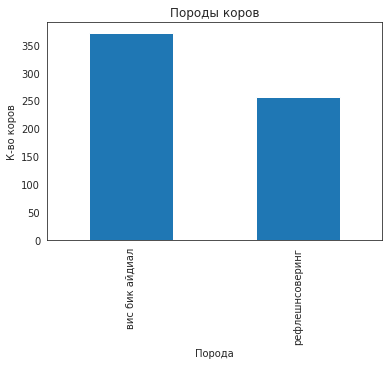

In [92]:
# Рассмотрим породу коров
ferma_main['breed'].value_counts().plot(kind='bar', title="Породы коров",xlabel="Порода", ylabel="К-во коров")

Порода коровы не соответствует породе быка-папы. Это связано со спецификой наименования коров, поэтому менять здесь ничего не нужно

<AxesSubplot:title={'center':'Количество коров по типам пастбищ'}, xlabel='Тип пастбищ', ylabel='К-во коров'>

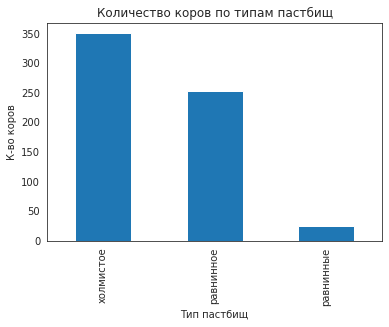

In [93]:
# Сравним количествто коров по типам пастбищ

ferma_main['pasture_type'].value_counts().plot(kind='bar', title="Количество коров по типам пастбищ",xlabel="Тип пастбищ", ylabel="К-во коров")

Видно, что типов всего два. Необходимо объединить 'равнинные' с 'равнинное'

<AxesSubplot:title={'center':'Количество коров по типам пастбищ'}, xlabel='Тип пастбищ', ylabel='К-во коров'>

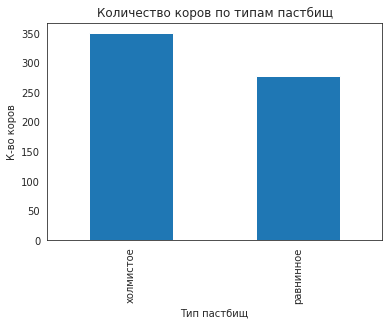

In [94]:
# объединим и проверим
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('равнинные', 'равнинное') 
ferma_main['pasture_type'].value_counts().plot(kind='bar', title="Количество коров по типам пастбищ",xlabel="Тип пастбищ", ylabel="К-во коров")

<AxesSubplot:title={'center':'Порода быка папы'}, xlabel='Порода', ylabel='К-во коров'>

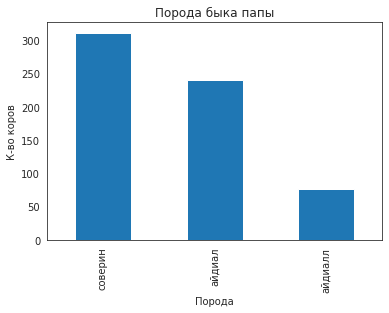

In [95]:
# рассмотрим породу быка папы
ferma_main['papa_bull_breed'].value_counts().plot(kind='bar', title="Порода быка папы",xlabel="Порода", ylabel="К-во коров")

Как и выше, наблюдается две одинаковые породы, написанные по-разному. Объединим их

<AxesSubplot:title={'center':'Порода быка папы'}, xlabel='Порода', ylabel='К-во коров'>

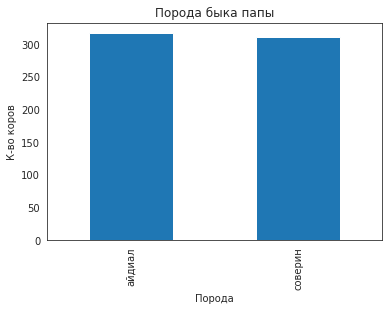

In [96]:
# Объединим и проверим
ferma_main['papa_bull_breed'] = ferma_main['papa_bull_breed'].replace('айдиалл', 'айдиал') 
ferma_main['papa_bull_breed'].value_counts().plot(kind='bar', title="Порода быка папы",xlabel="Порода", ylabel="К-во коров")

<AxesSubplot:title={'center':'Возраст коровы'}, xlabel='Возраст', ylabel='К-во коров'>

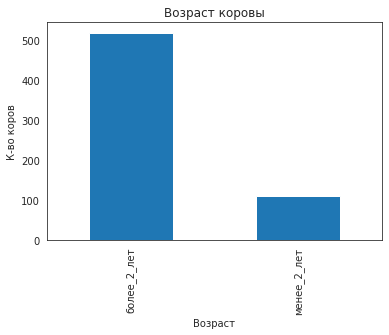

In [97]:
# рассмотрим возраст коров
ferma_main['age'].value_counts().plot(kind='bar', title="Возраст коровы",xlabel="Возраст", ylabel="К-во коров")

<AxesSubplot:title={'center':'Вкус молока'}, xlabel='Вкус', ylabel='К-во коров'>

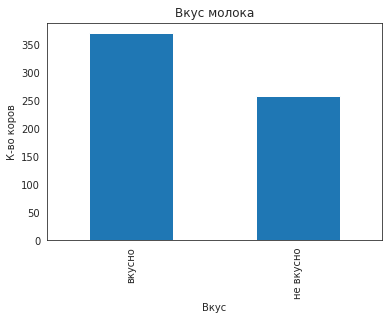

In [98]:
# Рассмотрим вкус молока
ferma_main['milk_taste'].value_counts().plot(kind='bar', title="Вкус молока",xlabel="Вкус", ylabel="К-во коров")

#### Рассмотрим количественные признаки cow_buy

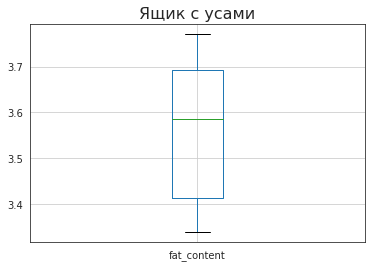

In [99]:
# Рассмотрим колонку жирность перед продажей  и построим boxplot
cow_buy.boxplot(column='fat_content')
plt.title('Ящик с усами', fontsize=16)
plt.show()

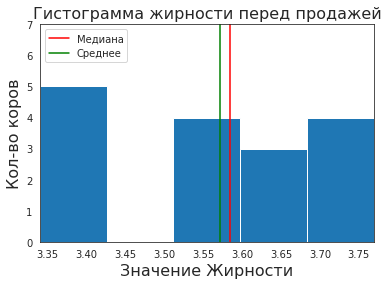

In [100]:
# Построим гистограмму жирности перед продажей
names_efu=['Гистограмма жирности перед продажей', 'Значение Жирности', 'Кол-во коров']
y_lim_efu=[0, 7]
hist_visio(cow_buy['fat_content'], names_efu, y_lim_efu, 5)

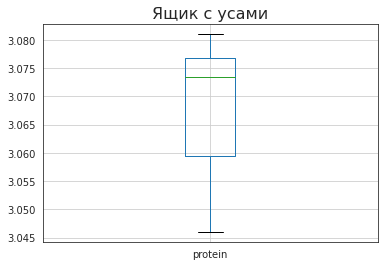

In [101]:
# Рассмотрим колонку текущий уровнь белка и построим boxplot
cow_buy.boxplot(column='protein')
plt.title('Ящик с усами', fontsize=16)
plt.show()

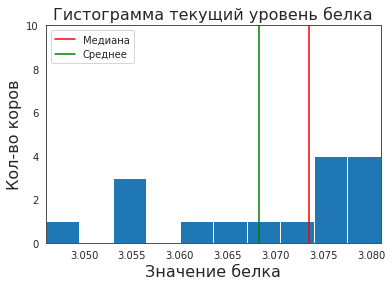

In [102]:
# Построим гистограмму жирности перед продажей
names_efu=['Гистограмма текущий уровень белка', 'Значение белка', 'Кол-во коров']
y_lim_efu=[0, 10]
hist_visio(cow_buy['protein'], names_efu, y_lim_efu, 10)

#### Рассмотрим категориальные признаки cow_buy

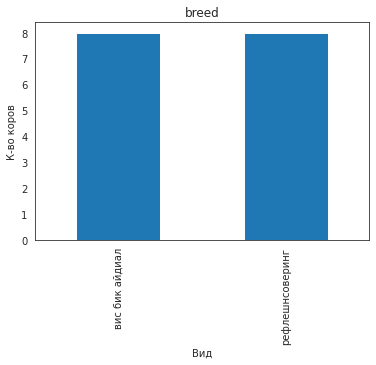

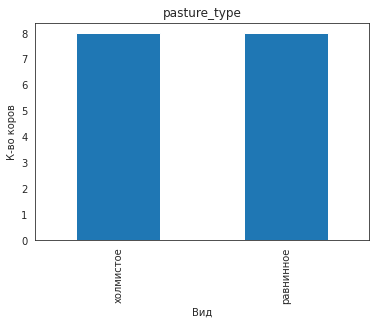

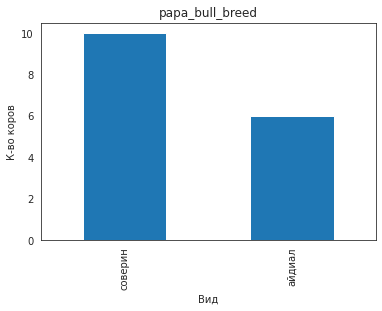

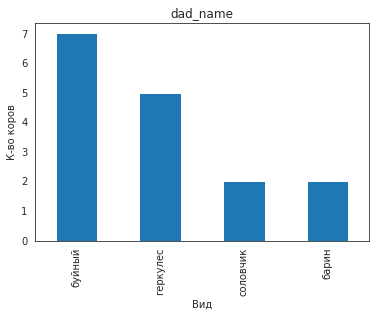

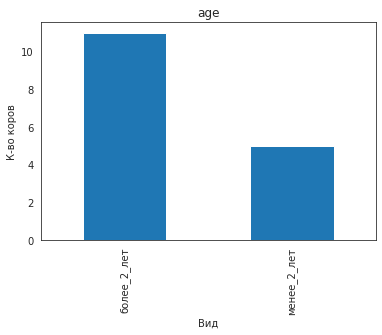

In [103]:
columns=['breed', 'pasture_type', 'papa_bull_breed', 'dad_name', 'age']


for column in columns:
    cow_buy[column].value_counts().plot(kind='bar', title=column ,xlabel="Вид", ylabel="К-во коров")
    plt.show()

При расмотрении данных ничего не бросается в глаза

#### Рассмотрим ferma_dad

<AxesSubplot:title={'center':'Имена пап-быков'}, xlabel='Имена', ylabel='К-во детей'>

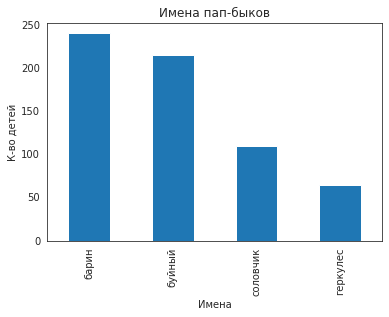

In [104]:
ferma_dad['dad_name'].value_counts().plot(kind='bar', title='Имена пап-быков' ,xlabel="Имена", ylabel="К-во детей")

#### Вывод

Данные готовы для проведения корреляционного анализа

Не все призаки распределениы нормально

<AxesSubplot:>

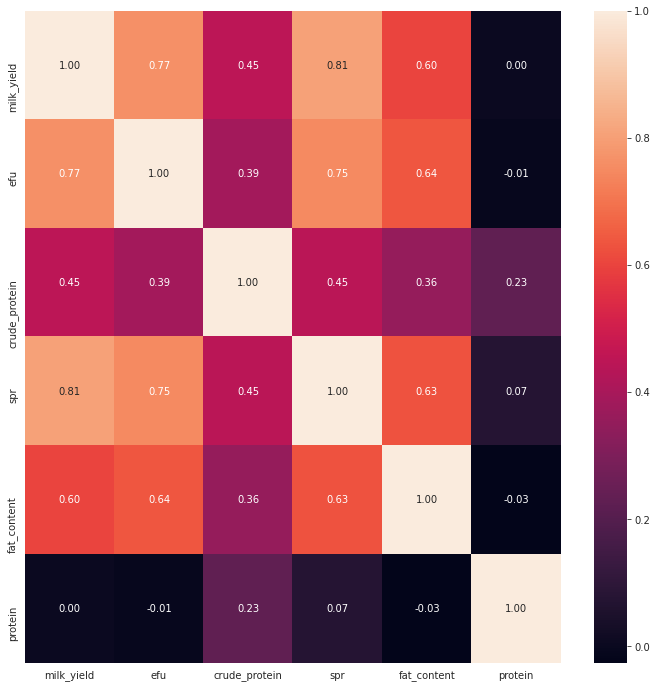

In [105]:
#### построим матрицу корреляции
corr_table=ferma_main.columns[1:]

corr_matrix = ferma_main[corr_table].corr()

fig, ax = plt.subplots(figsize=(12, 12))
# Визуализация корреляционной матрицы как тепловой карты
sns.set_style("white")
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

#### Рассмотрим корреляцию Спирмана

interval columns not set, guessing: ['id', 'milk_yield', 'efu', 'crude_protein', 'spr', 'fat_content', 'protein']


<AxesSubplot:>

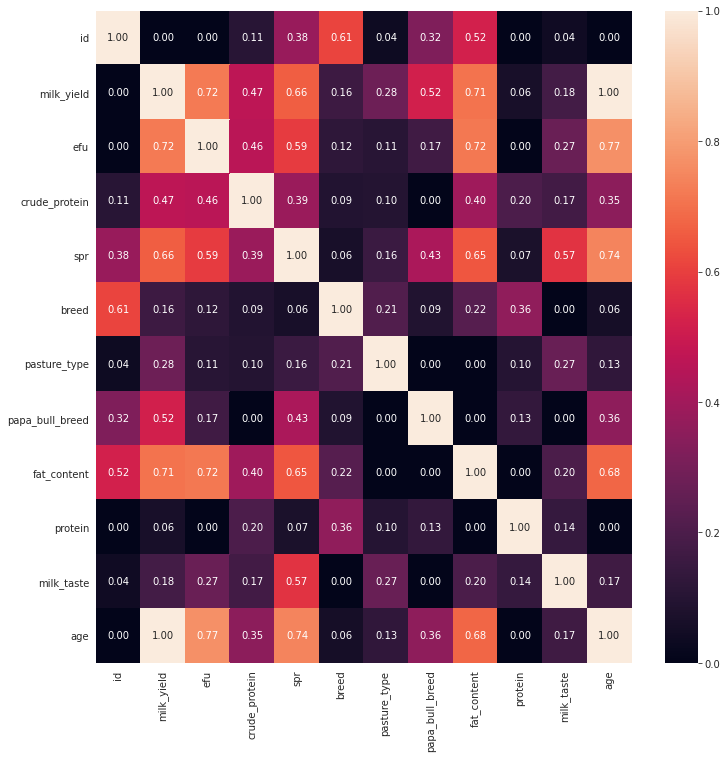

In [106]:
fig, ax = plt.subplots(figsize=(12, 12))
# Визуализация корреляционной матрицы как тепловой карты
sns.set_style("white")
sns.heatmap(ferma_main.phik_matrix() , annot=True, fmt='.2f')


Рассмотрим целевой признак milk_yield (удой). Судя по коэффициентам корреляции линейная связь целевой переменной наблюдается с  большинством количесвтвенных парамеров.

Коэффицианты корреляции Пирсона распределены следующим образом:

1. Сильная линейная связь между Удоем и Сахарно-протеиновым соотношением - 0,81
2. Сильная линейная связь между Удоем и Энергетичекой кормовой единицей, по сути с видом корма (efu) - 0,77

3. Существенная линейная связь между Удоем и Жирностью - 0.6
4. Существенная линейная связь между Удоем и Сырой протеин - 0.45

Судя по коээфициенту Спирмана:

1. Наибольшая связь наблюдается между удоем и возрастом коровы - 1.00
2. Далее между удоем и ЭКЕ - 0.72
3. Удой и жирность - 0.71


Нет связи между удоем и соделжанием белков в молоке.

Колонка Протеин не имеет линейной связи ни с одним из признаков, значит его можно исключить из процесса моделирования.


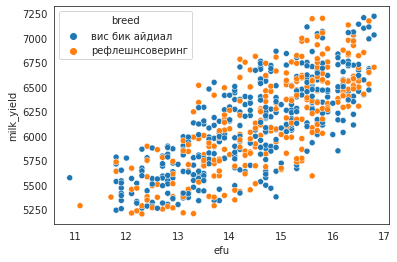

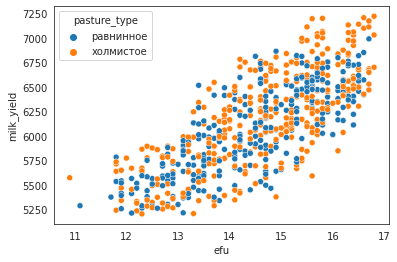

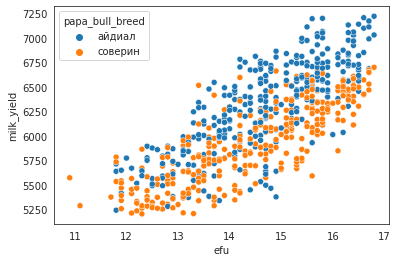

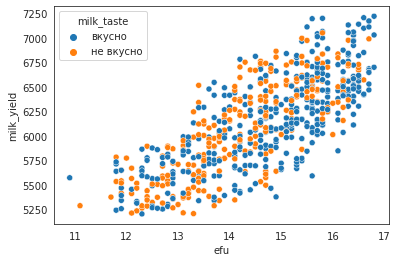

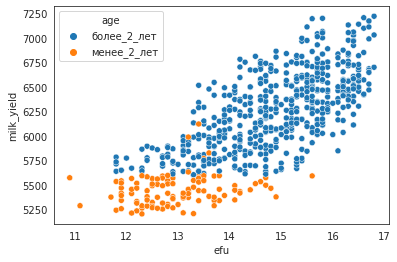

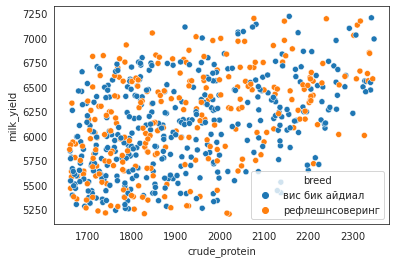

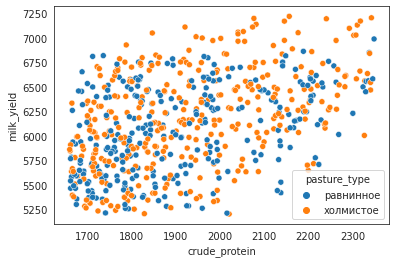

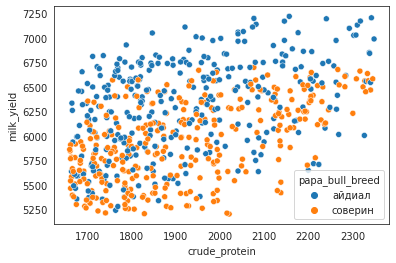

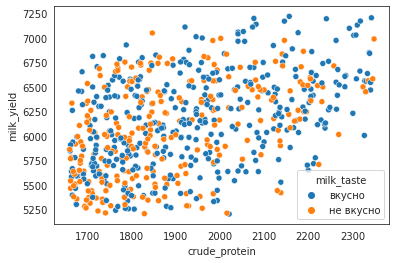

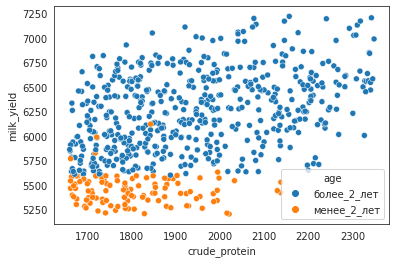

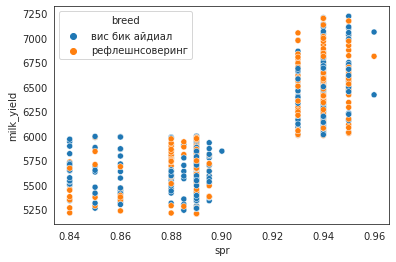

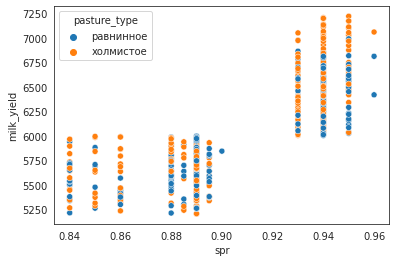

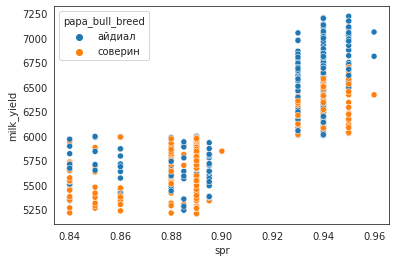

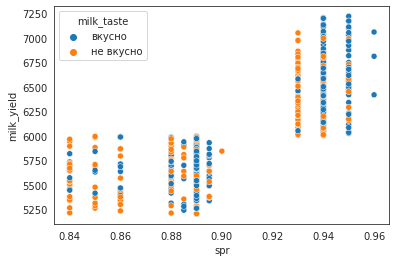

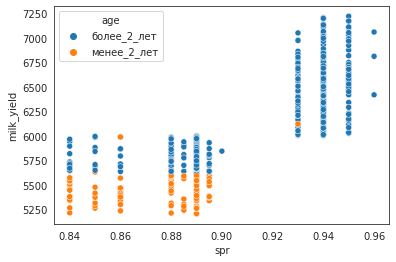

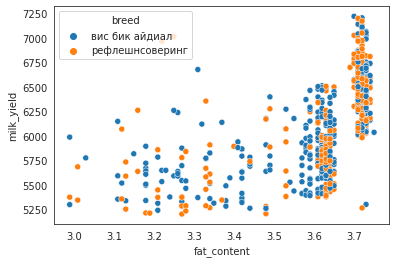

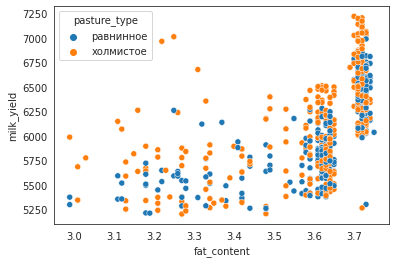

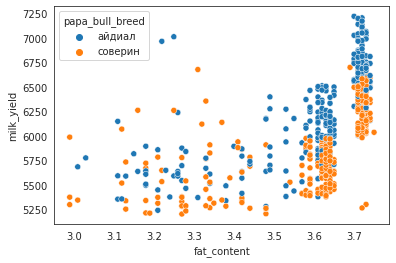

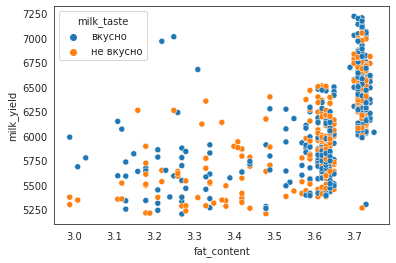

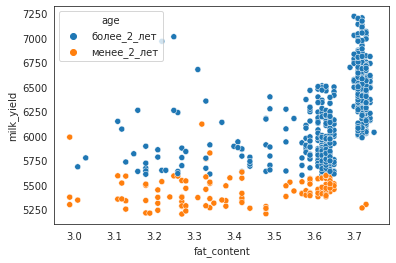

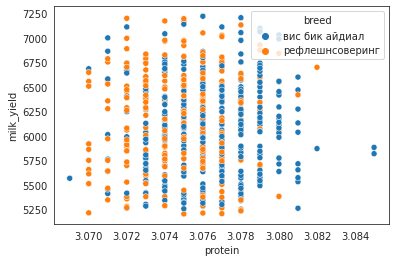

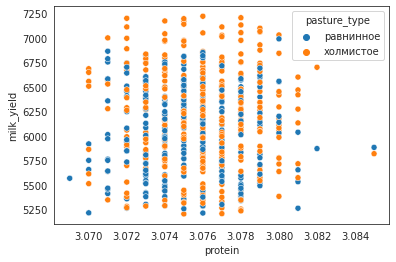

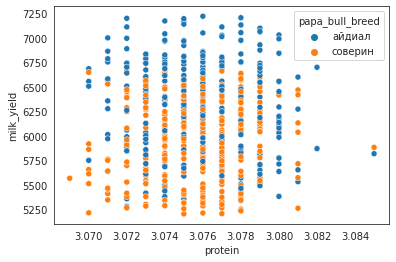

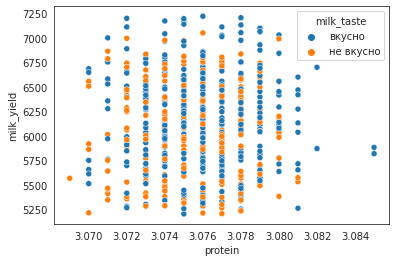

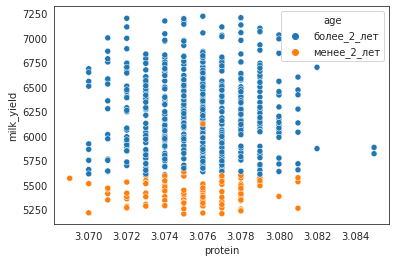

In [107]:
# построитм диаграммы рассеяния с учетом категориальных признаков
cat_list=["breed","pasture_type", "papa_bull_breed","milk_taste","age"]
qua_list=["milk_yield","efu","crude_protein","spr","fat_content", "protein"]


for i in range(1,6):
    for value in cat_list:
        sns.scatterplot(data=ferma_main, x=qua_list[i], y=qua_list[0], hue=value)
        plt.show()
        


#### Выводы:

1. Несмотря на большое значение коэффициента корреляции, связь между Удоем и Сахарно-протеиновым соотношением нелинейная. Видно, что сахарно-протеиновое соотношение зависит от возраста коровы. Значения sfu>0,9 характерны для коров старше 2 лет. СПС больше похож на категориальный признак. Нет необходимости вводить дополнительные признаки.

2. Сильная линейная связь между Удоем и Энергетичекой кормовой единицей, по сути с видом корма (efu) - 0,77. Также efu зависит от возрата коровы. 

3. Существенная линейная связь между Удоем и Жирностью - 0.6 . Жирность зависит от возраста коров. Чем больше возраст, тем выше жирность.

4. Существенная линейная связь между Удоем и Сырой протеин - 0.45. Содержание белков зависит от породы и возраста. 

Мультиколлинеарных признаков нет.

Колонка Протеин не имеет линейной связи ни с одним из признаков, значит его можно исключить из процесса моделирования.

#### Построим модель линейного обучения

In [108]:
# функция линейной регресии со всем необходимым
def encoder_scaler(X_train, X_test, y_train, y_test, cat_col_names, num_col_names):
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    encoder_col_names = encoder.get_feature_names_out()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    return [X_train, X_test, encoder, scaler]



def linear(df, cat_col_names, num_col_names):
    RANDOM_STATE = 42
    
    X = df.drop('milk_yield', axis=1)
    y = df['milk_yield']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    )
   
    X_train, X_test, encoder, scaler=encoder_scaler(X_train, X_test, y_train, y_test, cat_col_names, num_col_names)
    
    model_lr  = LinearRegression() 
    
    model_lr.fit(X_train, y_train)
    
    predictions = model_lr.predict(X_test)
    
    residuals = y_test - predictions
    

    return [predictions, y_test, model_lr, encoder, scaler]
   
    
# функция анализа остатков

def analysis_balances(y_test, predictions):
    residuals = y_test - predictions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    axes[0].hist(residuals)
    
    axes[0].set_title('Гистограмма распределения остатков')
    
    axes[0].set_xlabel('Остатки')
    
    mean = residuals.mean()
    
    axes[0].axvline(0, color='red', linestyle='-')  
    axes[0].axvline(mean, color='green', linestyle='-')
    axes[0].legend(['Нулевое', 'Среднее'], loc='upper left')
    
    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    r2 = r2_score(y_test, predictions)  
    print("R2 LinearRegression =", r2)
    

#### Модель №1 

In [109]:
!pip install -U scikit-learn

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


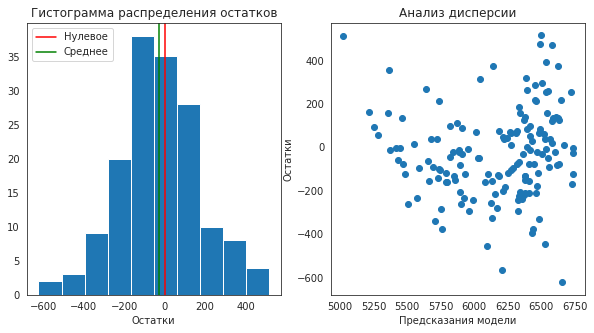

R2 LinearRegression = 0.7942830116854828


In [110]:
# выберем все значимые признаки. Столбец Протеин не интересен.
cat_col_names_1 = ['breed','pasture_type', 'papa_bull_breed','milk_taste','age']
num_col_names_1 = ['efu','crude_protein','spr','fat_content']

y_pred_1, y_test_1, model_lr_1,  encoder_1, scaler_1 =linear(ferma_main, cat_col_names_1, num_col_names_1)

analysis_balances(y_test_1, y_pred_1)

Из гистограммы распределения остатков видно, что среднее значение смещено влево от нуля, следовательно модель часто даёт завышенные  предсказания, 
её прогнозы больше истинных значений. 

Дисперсия остатков в целом равномерная, но виднеется небольшой рупор, что говорит об увеличивающейся ошибкт предсказания для больших значений  удоя

Судя по коэффициенту детерминации предсказательная способность модели оценивается на "Так себе" 

#### Модель 2

In [111]:
# Составим новый столбец, преобразовав СПО в категориальный бинарный признак

ferma_main_2=ferma_main.assign(category_spr=lambda x: x['spr'] < 0.92)
ferma_main_2.drop('spr', axis=1, inplace=True)

# введем новый признак ЭКЕ в квадрате

ferma_main_2["efu_2"] = ferma_main_2["efu"] ** 2
ferma_main_2.drop('efu', axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


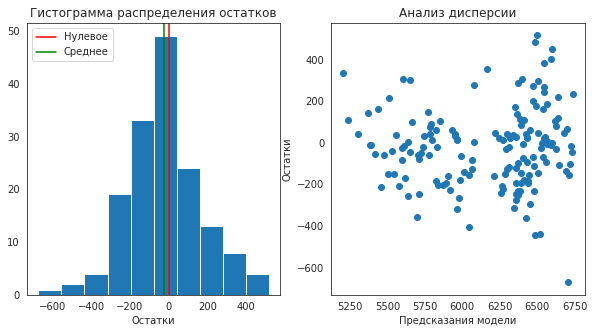

R2 LinearRegression = 0.8188450488553471


In [112]:
cat_col_names_2 = ['breed','pasture_type', 'papa_bull_breed','milk_taste','age','category_spr']
num_col_names_2 = ['efu_2','crude_protein','fat_content']

y_pred_2, y_test_2, model_lr_2,  encoder_2, scaler_2 =linear(ferma_main_2, cat_col_names_2, num_col_names_2)
analysis_balances(y_test_2, y_pred_2)

На гистограмме распределения остатков, как в прошлой модели,  видно, что среднее значение смещено влево от нуля, следовательно модель часто даёт завышенные  предсказания, 
её прогнозы больше истинных значений. 

Дисперсия остатков в целом равномерная.

Коэффициент детерминации выше, чем у предыдущей модели.  Модель показывает более высокую предсказетельную способность

#### Модель №3

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


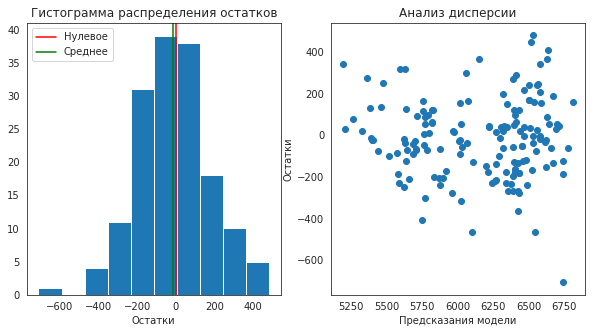

R2 LinearRegression = 0.8246412989002073


In [113]:
# Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

ferma_main_3 = ferma_main_2.merge(ferma_dad, on='id')

cat_col_names_3 = ['breed','pasture_type', 'papa_bull_breed','milk_taste','age','category_spr', 'dad_name']
num_col_names_3 = ['efu_2','crude_protein','fat_content']

y_pred_3, y_test_3, model_lr_3,  encoder_3, scaler_3 =linear(ferma_main_3, cat_col_names_3, num_col_names_3)
analysis_balances(y_test_3, y_pred_3)

По гистограмме распределения остатков видно, что в модели №3 среднее значение совпадает с нулем, следовательно модель одинаково ошибается как вправо, так и влево. Дисперсия остатков равномерная. Коэффициент R² наилудший из всех моделей.

In [114]:
# Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE. 

def quality_assessment(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    print("MSE: %.2f" % mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE = {mae:.0f}')
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: %.2f" % rmse)

print('--- Качество модели №1 ---')
quality_assessment(y_pred_1, y_test_1)
print('--- Качество модели №2 ---')
quality_assessment(y_pred_2, y_test_2)
print('---Качество модели №3---')
quality_assessment(y_pred_3, y_test_3)
    

--- Качество модели №1 ---
MSE: 41876.77
MAE = 160
RMSE: 204.64
--- Качество модели №2 ---
MSE: 36876.80
MAE = 147
RMSE: 192.03
---Качество модели №3---
MSE: 35696.89
MAE = 146
RMSE: 188.94


In [115]:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(y_pred_3), scale=st.sem(y_pred_3)))

95% доверительный интервал = (6091.0901880069005, 6220.392905502408)


#### Вывод:

На основании анализа метрик, распределения остатков и коэффициента R2 лучшей моделью признайтся модель №3

95% доверительный интервал прогноза лучшей модели сосавляет = (6091.0901880069005, 6220.392905502408)



In [116]:
cow_buy['efu']=ferma_main['efu'].mean()*1.05
cow_buy['crude_protein']=ferma_main['crude_protein'].mean()*1.05
cow_buy['spr']=ferma_main['spr'].mean()*1.05

cow_buy=cow_buy.assign(category_spr=lambda x: x['spr'] < 0.92)
cow_buy.drop('spr', axis=1, inplace=True)

# введем новый признак ЭКЕ в квадрате
cow_buy["efu_2"] = cow_buy["efu"] ** 2
cow_buy.drop('efu', axis=1, inplace=True)



cat_col_names_3 = ['breed','pasture_type', 'papa_bull_breed','age','category_spr', 'dad_name']
num_col_names_3 = ['efu_2','crude_protein','fat_content']

y_pred_3, y_test_3, model_lr_3,  encoder_3, scaler_3 =linear(ferma_main_3, cat_col_names_3, num_col_names_3)

X_test_ohe = encoder_3.transform(cow_buy[cat_col_names_3])
    
encoder_col_names = encoder_3.get_feature_names_out()

X_test_scaled = scaler_3.transform(cow_buy[num_col_names_3])
    
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names_3)

    
X_test_cow_buy = pd.concat([X_test_ohe, X_test_scaled], axis=1)


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
# предсказание для покупных коров

cow_buy = cow_buy.assign(
    predict=model_lr_3.predict(X_test_cow_buy)
)
cow_buy

,breed,pasture_type,papa_bull_breed,dad_name,fat_content,protein,age,crude_protein,category_spr,efu_2,predict
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,2019.947532,False,233.361138,6592.487002
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,2019.947532,False,233.361138,6358.263822
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,2019.947532,False,233.361138,6255.479529
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,2019.947532,False,233.361138,6538.111496
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,2019.947532,False,233.361138,6530.648380
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,2019.947532,False,233.361138,6421.844445
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,2019.947532,False,233.361138,6541.317029
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,2019.947532,False,233.361138,6361.273860
10,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,2019.947532,False,233.361138,6350.766936
11,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,2019.947532,False,233.361138,6619.400652


#### По прогнозу все коровы будуть давать много молока

## Обучение модели логистической регрессии

#### Шаг 6. Задача классификации

1. Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.

    - Используйте в качестве целевого признак Вкус молока.
    - При необходимости преобразуйте имеющиеся или добавьте новые признаки.
    - Разбейте данные на тренировочную и тестовую выборки.
    - Кодируйте категориальные признаки с помощью OneHotEncoder.
    - Масштабируйте количественные признаки с помощью StandardScaler.
    - Обучите модель логистической регрессии на подготовленных данных.
    - Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
    - Постройте матрицу ошибок.

2. Проанализируйте модель логистической регрессии.

    - Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
    - Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
    - Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

3. С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

    - Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
    - Получите прогноз вкуса молока коров.

acc:  0.6114649681528662
recall:  0.29
precision:  0.625


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


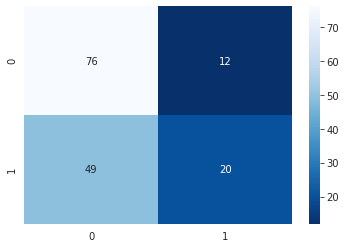

In [118]:
RANDOM_STATE = 42

ferma_without=ferma_main_3['milk_taste']

ferma_main_3['milk_taste']=pd.get_dummies(ferma_main_3['milk_taste'], drop_first=True)

# разбиваем признаки на входные и целевой
X = ferma_main_3.drop(columns=['milk_taste'])
y = ferma_main_3['milk_taste']


# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['breed','pasture_type', 'papa_bull_breed','age','category_spr', 'dad_name']
num_col_names = ['efu_2','crude_protein','fat_content']

# X_train, X_test, encoder, scaler=encoder_scaler(X_train, X_test, y_train, y_test, cat_col_names, num_col_names)



X_train_ohe = encoder_3.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder_3.transform(X_test[cat_col_names])
    
encoder_col_names = encoder_3.get_feature_names_out()

X_train_scaled = scaler_3.fit_transform(X_train[num_col_names])
X_test_scaled = scaler_3.transform(X_test[num_col_names])
    
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)



# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)


# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('acc: ', acc)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

#### Анализ моделиз логистической регрессии.

1. Исходя из ТЗ для Заказчика важен вкус молока. Т.е. модель, если модель будет часто предсказывать ложноположительные результаты, то Закзачик может огорчиться. расстроится.  Т.е. для покупки коровы, у которой вкусное молоко необходимо минимизировать минимизировать ошибку второго рода.

Recall - полнота, Precision (точность). Нам необходимо уменьшить количество ложноположительных результатов. 

Следовательно необходимо максиально увеличить Precision.


acc:  0.5859872611464968
recall:  0.058
precision:  1.0


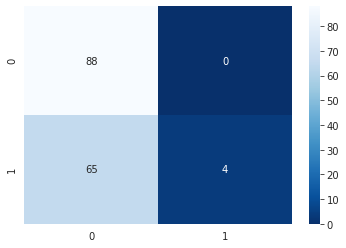

In [119]:
# Определение коэффициента отсечения


y_predict = clf.predict_proba(X_test)[:,1]



data = pd.DataFrame(zip(y_test, y_predict),
             columns = ['y_real', 'y_predict']).sort_values(by='y_predict',ascending=False)


i = 0.67

data['y_pred_new'] = data['y_predict'].apply(lambda x: 1 if x >= i else 0 )


# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(data['y_real'], data['y_pred_new'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

acc = accuracy_score(data['y_real'], data['y_pred_new'])
recall = recall_score(data['y_real'], data['y_pred_new'])
precision = precision_score(data['y_real'], data['y_pred_new'])

print('acc: ', acc)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

#### При границе отсечение 0.67 закзачик не  будет иметь ложноположительных  результатов.  

In [120]:
# Сделаем прогноз

y_pred = clf.predict_proba(X_test_cow_buy)[:,1]

cow_buy = cow_buy.assign(
   y_pred=y_pred)

i = 0.43

cow_buy['exactly_buy'] = cow_buy['y_pred'].apply(lambda x: 1 if x >= i else 0 )


cow_buy

,breed,pasture_type,papa_bull_breed,dad_name,fat_content,protein,age,crude_protein,category_spr,efu_2,predict,y_pred,exactly_buy
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,2019.947532,False,233.361138,6592.487002,0.283086,0
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,2019.947532,False,233.361138,6358.263822,0.450715,1
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,2019.947532,False,233.361138,6255.479529,0.408251,0
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,2019.947532,False,233.361138,6538.111496,0.281104,0
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,2019.947532,False,233.361138,6530.648380,0.418904,0
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,2019.947532,False,233.361138,6421.844445,0.503830,1
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,2019.947532,False,233.361138,6541.317029,0.403241,0
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,2019.947532,False,233.361138,6361.273860,0.323222,0
10,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,2019.947532,False,233.361138,6350.766936,0.362789,0
11,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,2019.947532,False,233.361138,6619.400652,0.458752,1


#### Выводы:
    
    Анализ линейной регрессиии показал, что все коровы из списка на продажу будут показывать хороший удой. 
    Однако по модели классификации не всё так однозначно.
    При границе отсечения равной 0.82, по данным, модель не прогнозирует коров со вкусным молоком. 
    При уменьнии порога отсечения до 0.718 появляются две коровы, которые можно приобрести. При этом метрика precision, близка, но не равна 1.  
    Следовательно, с минимальными рисками, но не нуливыми раисками, Заказчик может приобрести две коровы, отмеченные 1 в колонке exactly_buy.
    